In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Setting maximum rows and columns display size to 200 for better visibility of data 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Import dataset

data = 'Leads.csv'
df = pd.read_csv('Leads.csv')

In [3]:
# Preview the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df.shape

(9240, 37)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
# Rename column names

col_names = [
    'Prospect_ID','Lead_Number','Lead_Origin','Lead_Source','Do_Not_Email','Do_Not_Call','Converted','TotalVisits','Total_Time_Spent_on_Website',
    'Page_Views_Per_Visit','Last_Activity','Country','Specialization','Referral_Source','Current_Occupation','Course_Selection_Factors',
    'Search','Magazine','Newspaper_Article','Education_Form','Newspaper','Digital_Advertisement','Through_Recommendations','More_Updates',
    'Tags','Lead_Quality','Update_Supplychain_Content','Updates_On_DM_Content','Lead_Profile','City','Asymmetrique_Activity_Index',
    'Asymmetrique_Profile_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score','Amount_Paid_Cheque','Free_Copy_Mastering_Interview',
    'Last_Notable_Activity']
df.columns = col_names
df.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'Referral_Source', 'Current_Occupation',
       'Course_Selection_Factors', 'Search', 'Magazine', 'Newspaper_Article',
       'Education_Form', 'Newspaper', 'Digital_Advertisement',
       'Through_Recommendations', 'More_Updates', 'Tags', 'Lead_Quality',
       'Update_Supplychain_Content', 'Updates_On_DM_Content', 'Lead_Profile',
       'City', 'Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index',
       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score',
       'Amount_Paid_Cheque', 'Free_Copy_Mastering_Interview',
       'Last_Notable_Activity'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Prospect_ID                    9240 non-null   object 
 1   Lead_Number                    9240 non-null   int64  
 2   Lead_Origin                    9240 non-null   object 
 3   Lead_Source                    9204 non-null   object 
 4   Do_Not_Email                   9240 non-null   object 
 5   Do_Not_Call                    9240 non-null   object 
 6   Converted                      9240 non-null   int64  
 7   TotalVisits                    9103 non-null   float64
 8   Total_Time_Spent_on_Website    9240 non-null   int64  
 9   Page_Views_Per_Visit           9103 non-null   float64
 10  Last_Activity                  9137 non-null   object 
 11  Country                        6779 non-null   object 
 12  Specialization                 7802 non-null   o

In [17]:
df.describe()

,Lead_Number,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [19]:
df.isnull().sum()

Prospect_ID                         0
Lead_Number                         0
Lead_Origin                         0
Lead_Source                        36
Do_Not_Email                        0
Do_Not_Call                         0
Converted                           0
TotalVisits                       137
Total_Time_Spent_on_Website         0
Page_Views_Per_Visit              137
Last_Activity                     103
Country                          2461
Specialization                   1438
Referral_Source                  2207
Current_Occupation               2690
Course_Selection_Factors         2709
Search                              0
Magazine                            0
Newspaper_Article                   0
Education_Form                      0
Newspaper                           0
Digital_Advertisement               0
Through_Recommendations             0
More_Updates                        0
Tags                             3353
Lead_Quality                     4767
Update_Suppl

In [21]:
# List of columns to drop having more than 50% of nulls
columns_to_drop = ['Prospect_ID','Lead_Number','Lead_Source', 'Tags','Lead_Quality','Asymmetrique_Activity_Index',
                  'Asymmetrique_Profile_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score']
df.drop(columns_to_drop, axis = 1, inplace=True)

In [23]:
# Drop the rows with null values if the number of null values is around 1-2%
df = df.dropna(subset=['TotalVisits', 'Page_Views_Per_Visit', 'Last_Activity'])
df.isnull().sum()

Lead_Origin                         0
Do_Not_Email                        0
Do_Not_Call                         0
Converted                           0
TotalVisits                         0
Total_Time_Spent_on_Website         0
Page_Views_Per_Visit                0
Last_Activity                       0
Country                          2324
Specialization                   1431
Referral_Source                  2200
Current_Occupation               2683
Course_Selection_Factors         2702
Search                              0
Magazine                            0
Newspaper_Article                   0
Education_Form                      0
Newspaper                           0
Digital_Advertisement               0
Through_Recommendations             0
More_Updates                        0
Update_Supplychain_Content          0
Updates_On_DM_Content               0
Lead_Profile                     2702
City                             1419
Amount_Paid_Cheque                  0
Free_Copy_Ma

In [25]:
# Fill missing values in categorical columns with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().sum()

Lead_Origin                      0
Do_Not_Email                     0
Do_Not_Call                      0
Converted                        0
TotalVisits                      0
Total_Time_Spent_on_Website      0
Page_Views_Per_Visit             0
Last_Activity                    0
Country                          0
Specialization                   0
Referral_Source                  0
Current_Occupation               0
Course_Selection_Factors         0
Search                           0
Magazine                         0
Newspaper_Article                0
Education_Form                   0
Newspaper                        0
Digital_Advertisement            0
Through_Recommendations          0
More_Updates                     0
Update_Supplychain_Content       0
Updates_On_DM_Content            0
Lead_Profile                     0
City                             0
Amount_Paid_Cheque               0
Free_Copy_Mastering_Interview    0
Last_Notable_Activity            0
dtype: int64

In [27]:
# Get the number of unique categories in each categorical column
category_counts = df.select_dtypes(include=['object']).nunique()

# Display the result
print(category_counts)

Lead_Origin                       4
Do_Not_Email                      2
Do_Not_Call                       2
Last_Activity                    17
Country                          38
Specialization                   19
Referral_Source                  10
Current_Occupation                6
Course_Selection_Factors          3
Search                            2
Magazine                          1
Newspaper_Article                 2
Education_Form                    2
Newspaper                         2
Digital_Advertisement             2
Through_Recommendations           2
More_Updates                      1
Update_Supplychain_Content        1
Updates_On_DM_Content             1
Lead_Profile                      6
City                              7
Amount_Paid_Cheque                1
Free_Copy_Mastering_Interview     2
Last_Notable_Activity            16
dtype: int64


In [27]:
# Column with one category dropped
columns_to_drop = ['Magazine','More_Updates','Update_Supplychain_Content', 'Updates_On_DM_Content','Amount_Paid_Cheque']
df.drop(columns_to_drop, axis = 1, inplace=True)

In [29]:
# Get the number of unique categories in each categorical column
category_counts = df.select_dtypes(include=['object']).nunique()

# Display the result
print(category_counts)

Lead_Origin                       4
Do_Not_Email                      2
Do_Not_Call                       2
Last_Activity                    17
Country                          38
Specialization                   19
Referral_Source                  10
Current_Occupation                6
Course_Selection_Factors          3
Search                            2
Newspaper_Article                 2
Education_Form                    2
Newspaper                         2
Digital_Advertisement             2
Through_Recommendations           2
Lead_Profile                      6
City                              7
Free_Copy_Mastering_Interview     2
Last_Notable_Activity            16
dtype: int64


In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the specified categorical columns
categorical_columns = ['Country', 'Last_Activity', 'Specialization', 'Lead_Profile', 'City', 'Last_Notable_Activity']  # List of columns to encode

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the transformed DataFrame
print(df)

                  Lead_Origin Do_Not_Email Do_Not_Call  Converted  \
0                         API           No          No          0   
1                         API           No          No          0   
2     Landing Page Submission           No          No          1   
3     Landing Page Submission           No          No          0   
4     Landing Page Submission           No          No          1   
...                       ...          ...         ...        ...   
9235  Landing Page Submission          Yes          No          1   
9236  Landing Page Submission           No          No          0   
9237  Landing Page Submission          Yes          No          0   
9238  Landing Page Submission           No          No          1   
9239  Landing Page Submission           No          No          1   

      TotalVisits  Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0             0.0                            0                  0.00   
1             5.0          

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lead_Origin                    9103 non-null   object 
 1   Do_Not_Email                   9103 non-null   object 
 2   Do_Not_Call                    9103 non-null   object 
 3   Converted                      9103 non-null   int64  
 4   TotalVisits                    9103 non-null   float64
 5   Total_Time_Spent_on_Website    9103 non-null   int64  
 6   Page_Views_Per_Visit           9103 non-null   float64
 7   Last_Activity                  9103 non-null   int32  
 8   Country                        9103 non-null   int32  
 9   Specialization                 9103 non-null   int32  
 10  Referral_Source                9103 non-null   object 
 11  Current_Occupation             9103 non-null   object 
 12  Course_Selection_Factors       9103 non-null   object

In [35]:
# Check unique values in Do_Not_Email and Do_Not_Call columns
print(df['Lead_Origin'].unique())
print(df['Do_Not_Email'].unique())
print(df['Do_Not_Call'].unique())
print(df['Referral_Source'].unique())
print(df['Current_Occupation'].unique())
print(df['Course_Selection_Factors'].unique())
print(df['Search'].unique())
print(df['Newspaper_Article'].unique())
print(df['Education_Form'].unique())
print(df['Newspaper'].unique())
print(df['Digital_Advertisement'].unique())
print(df['Through_Recommendations'].unique())
print(df['Free_Copy_Mastering_Interview'].unique())

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
['No' 'Yes']
['No' 'Yes']
['Select' 'Word Of Mouth' 'Other' 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
['Unemployed' 'Student' 'Working Professional' 'Businessman' 'Other'
 'Housewife']
['Better Career Prospects' 'Flexibility & Convenience' 'Other']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [37]:
# Mapping function for Yes/No columns
yes_no_mapping = {'Yes': 1, 'No': 0}

# Apply mapping to Do_Not_Email and Do_Not_Call columns
df['Do_Not_Email'] = df['Do_Not_Email'].map(yes_no_mapping)
df['Do_Not_Call'] = df['Do_Not_Call'].map(yes_no_mapping)

# Apply mapping to Search, Newspaper_Article, Education_Form, Newspaper, Digital_Advertisement,
# Through_Recommendations, Free_Copy_Mastering_Interview columns
for col in ['Search', 'Newspaper_Article', 'Education_Form', 'Newspaper', 
            'Digital_Advertisement', 'Through_Recommendations', 'Free_Copy_Mastering_Interview']:
    df[col] = df[col].map(yes_no_mapping)

# Verify the changes
print(df[['Do_Not_Email', 'Do_Not_Call', 'Search', 'Newspaper_Article', 
          'Education_Form', 'Newspaper', 'Digital_Advertisement', 
          'Through_Recommendations', 'Free_Copy_Mastering_Interview']].head())


   Do_Not_Email  Do_Not_Call  Search  Newspaper_Article  Education_Form  \
0             0            0       0                  0               0   
1             0            0       0                  0               0   
2             0            0       0                  0               0   
3             0            0       0                  0               0   
4             0            0       0                  0               0   

   Newspaper  Digital_Advertisement  Through_Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   Free_Copy_Mastering_Interview  
0                              0  
1                              0  
2                              1  
3                       

In [39]:
# Mapping for Lead_Origin
lead_origin_mapping = {
    'API': 0,
    'Landing Page Submission': 1,
    'Lead Add Form': 2,
    'Lead Import': 3
}
df['Lead_Origin'] = df['Lead_Origin'].map(lead_origin_mapping)

# Mapping for Referral_Source
referral_source_mapping = {
    'Select': 0,
    'Word Of Mouth': 1,
    'Other': 2,
    'Online Search': 3,
    'Multiple Sources': 4,
    'Advertisements': 5,
    'Student of SomeSchool': 6,
    'Email': 7,
    'Social Media': 8,
    'SMS': 9
}
df['Referral_Source'] = df['Referral_Source'].map(referral_source_mapping)

# Mapping for Current_Occupation
current_occupation_mapping = {
    'Unemployed': 0,
    'Student': 1,
    'Working Professional': 2,
    'Businessman': 3,
    'Other': 4,
    'Housewife': 5
}
df['Current_Occupation'] = df['Current_Occupation'].map(current_occupation_mapping)

# Mapping for Course_Selection_Factors
course_selection_mapping = {
    'Better Career Prospects': 0,
    'Flexibility & Convenience': 1,
    'Other': 2
}
df['Course_Selection_Factors'] = df['Course_Selection_Factors'].map(course_selection_mapping)

# Verify the updated DataFrame
print(df.head())

   Lead_Origin  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0            0             0            0          0          0.0   
1            0             0            0          0          5.0   
2            1             0            0          1          2.0   
3            1             0            0          0          1.0   
4            1             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Last_Activity  Country  \
0                            0                   0.0             10       12   
1                          674                   2.5              5       12   
2                         1532                   2.0              5       12   
3                          305                   1.0             13       12   
4                         1428                   1.0              1       12   

   Specialization  Referral_Source  Current_Occupation  \
0              15                0            

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lead_Origin                    9103 non-null   int64  
 1   Do_Not_Email                   9103 non-null   int64  
 2   Do_Not_Call                    9103 non-null   int64  
 3   Converted                      9103 non-null   int64  
 4   TotalVisits                    9103 non-null   float64
 5   Total_Time_Spent_on_Website    9103 non-null   int64  
 6   Page_Views_Per_Visit           9103 non-null   float64
 7   Last_Activity                  9103 non-null   int32  
 8   Country                        9103 non-null   int32  
 9   Specialization                 9103 non-null   int32  
 10  Referral_Source                9103 non-null   int64  
 11  Current_Occupation             9103 non-null   int64  
 12  Course_Selection_Factors       9103 non-null   int64 

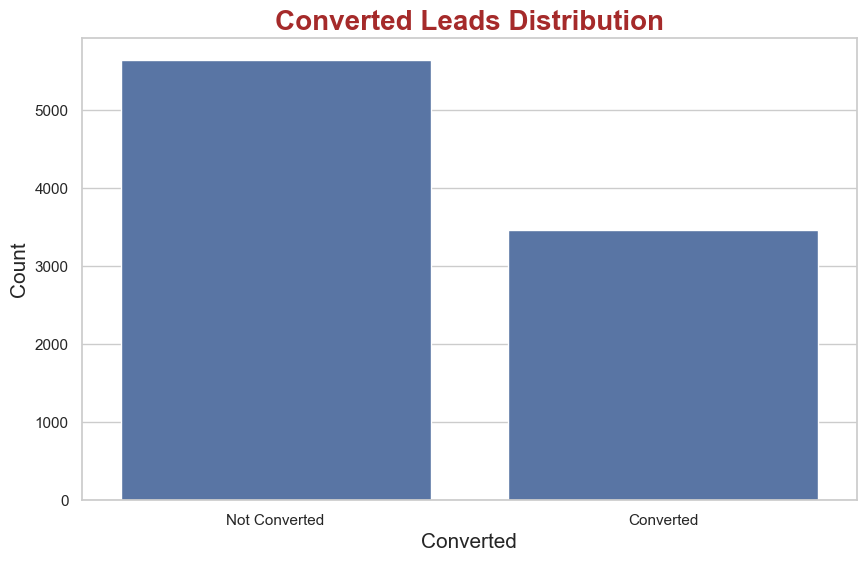

In [43]:
# Check the balance of the 'Converted' column
converted_counts = df['Converted'].value_counts()

# Plotting barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=converted_counts.index, y=converted_counts.values)

# Adding plot title and x & y labels
plt.title('Converted Leads Distribution', fontsize=20, fontweight='bold', color='Brown')
plt.xlabel('Converted', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'])  # Update based on your labels
plt.show()

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df.drop('Converted', axis=1)  # Drop target column
y = df['Converted']  # Target variable

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
new_class_distribution = y_resampled.value_counts()
print("New class distribution after Undersampling:")
print(new_class_distribution)


New class distribution after Undersampling:
Converted
0    3461
1    3461
Name: count, dtype: int64


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lead_Origin                    9103 non-null   int64  
 1   Do_Not_Email                   9103 non-null   int64  
 2   Do_Not_Call                    9103 non-null   int64  
 3   Converted                      9103 non-null   int64  
 4   TotalVisits                    9103 non-null   float64
 5   Total_Time_Spent_on_Website    9103 non-null   int64  
 6   Page_Views_Per_Visit           9103 non-null   float64
 7   Last_Activity                  9103 non-null   int32  
 8   Country                        9103 non-null   int32  
 9   Specialization                 9103 non-null   int32  
 10  Referral_Source                9103 non-null   int64  
 11  Current_Occupation             9103 non-null   int64  
 12  Course_Selection_Factors       9103 non-null   int64 

In [49]:
# List of columns to check for outliers
columns_to_check = ['Lead_Origin', 'Do_Not_Email', 'Do_Not_Call', 'TotalVisits', 'Total_Time_Spent_on_Website',
                    'Page_Views_Per_Visit', 'Last_Activity','Country', 'Specialization', 'Referral_Source', 'Current_Occupation',
                    'Course_Selection_Factors', 'Search', 'Newspaper_Article', 'Education_Form','Newspaper','Digital_Advertisement',
                    'Through_Recommendations','Lead_Profile', 'City', 'Free_Copy_Mastering_Interview', 'Last_Notable_Activity']

# Create a dictionary to store the outlier percentages
outlier_percentages = {}

# Loop through each specified column
for column in columns_to_check:
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count the number of outliers
    num_outliers = outliers.shape[0]
    
    # Count the total number of observations
    total_observations = df.shape[0]
    
    # Calculate the outlier percentage
    outlier_percentage = (num_outliers / total_observations) * 100
    
    # Store the result in the dictionary
    outlier_percentages[column] = outlier_percentage

# Print the outlier percentages for each column
for column, percentage in outlier_percentages.items():
    print(f'Outlier Percentage for {column}: {percentage:.2f}%')

Outlier Percentage for Lead_Origin: 0.34%
Outlier Percentage for Do_Not_Email: 7.95%
Outlier Percentage for Do_Not_Call: 0.02%
Outlier Percentage for TotalVisits: 2.93%
Outlier Percentage for Total_Time_Spent_on_Website: 0.00%
Outlier Percentage for Page_Views_Per_Visit: 3.95%
Outlier Percentage for Last_Activity: 0.00%
Outlier Percentage for Country: 3.15%
Outlier Percentage for Specialization: 0.00%
Outlier Percentage for Referral_Source: 21.85%
Outlier Percentage for Current_Occupation: 10.08%
Outlier Percentage for Course_Selection_Factors: 0.02%
Outlier Percentage for Search: 0.15%
Outlier Percentage for Newspaper_Article: 0.02%
Outlier Percentage for Education_Form: 0.01%
Outlier Percentage for Newspaper: 0.01%
Outlier Percentage for Digital_Advertisement: 0.04%
Outlier Percentage for Through_Recommendations: 0.08%
Outlier Percentage for Lead_Profile: 25.51%
Outlier Percentage for City: 0.00%
Outlier Percentage for Free_Copy_Mastering_Interview: 0.00%
Outlier Percentage for Last_

In [51]:
# Define a function to identify outliers using the IQR method
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to check for outliers
columns_to_check = ['Lead_Origin', 'Do_Not_Call', 'Course_Selection_Factors', 
                    'Search', 'Newspaper_Article', 'Education_Form','Newspaper',
                    'Digital_Advertisement', 'Through_Recommendations'] 
            

# Iterate through each column and drop outliers if they exist
for column in columns_to_check:
    df = drop_outliers(df, column)

# Check the resulting DataFrame
print(df.info())  # To see the new DataFrame after dropping outliers


<class 'pandas.core.frame.DataFrame'>
Index: 9045 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lead_Origin                    9045 non-null   int64  
 1   Do_Not_Email                   9045 non-null   int64  
 2   Do_Not_Call                    9045 non-null   int64  
 3   Converted                      9045 non-null   int64  
 4   TotalVisits                    9045 non-null   float64
 5   Total_Time_Spent_on_Website    9045 non-null   int64  
 6   Page_Views_Per_Visit           9045 non-null   float64
 7   Last_Activity                  9045 non-null   int32  
 8   Country                        9045 non-null   int32  
 9   Specialization                 9045 non-null   int32  
 10  Referral_Source                9045 non-null   int64  
 11  Current_Occupation             9045 non-null   int64  
 12  Course_Selection_Factors       9045 non-null   int64 

In [55]:
import pandas as pd

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv') # Uncomment this line to load your dataset

def replace_outliers_with_mean(data, column):
    # Calculate mean value
    mean_value = data[column].mean()
    
    # Calculate IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outlier_condition = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    # Replace outliers with mean value
    data.loc[outlier_condition, column] = mean_value
    
    return data

# List of columns to adjust
columns_to_adjust = ['Do_Not_Email', 'TotalVisits', 'Page_Views_Per_Visit', 
                     'Country', 'Referral_Source', 'Current_Occupation', 'Lead_Profile']

# Replace outliers for each specified column
for col in columns_to_adjust:
    df = replace_outliers_with_mean(df, col)

# Display the updated DataFrame
print(df.head())


   Lead_Origin  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0            0           0.0            0          0          0.0   
1            0           0.0            0          0          5.0   
2            1           0.0            0          1          2.0   
3            1           0.0            0          0          1.0   
4            1           0.0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Last_Activity  Country  \
0                            0                   0.0             10     12.0   
1                          674                   2.5              5     12.0   
2                         1532                   2.0              5     12.0   
3                          305                   1.0             13     12.0   
4                         1428                   1.0              1     12.0   

   Specialization  Referral_Source  Current_Occupation  \
0              15         0.000000            

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9045 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lead_Origin                    9045 non-null   int64  
 1   Do_Not_Email                   9045 non-null   int64  
 2   Do_Not_Call                    9045 non-null   int64  
 3   Converted                      9045 non-null   int64  
 4   TotalVisits                    9045 non-null   float64
 5   Total_Time_Spent_on_Website    9045 non-null   int64  
 6   Page_Views_Per_Visit           9045 non-null   float64
 7   Last_Activity                  9045 non-null   int32  
 8   Country                        9045 non-null   int32  
 9   Specialization                 9045 non-null   int32  
 10  Referral_Source                9045 non-null   int64  
 11  Current_Occupation             9045 non-null   int64  
 12  Course_Selection_Factors       9045 non-null   int64 

In [55]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Prepare Your Data
# Assume df is your DataFrame and 'Converted' is the target variable
X = df.drop('Converted', axis=1)  # Features
y = df['Converted']                # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)  # Initialize the model
rf_model.fit(X_train, y_train)                       # Fit the model

# Step 4: Make Predictions and Evaluate the Model
y_pred = rf_model.predict(X_test)                    # Make predictions

# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 5: Hyperparameter Tuning with Grid Search
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],                   # Number of trees
    'max_depth': [None, 10, 20, 30],                  # Max depth of the trees
    'min_samples_split': [2, 5, 10],                  # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                    # Min samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']          # Features to consider for best split
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1 Score:", grid_search_rf.best_score_)

# Step 6: Evaluate the Best Model
best_rf_model = grid_search_rf.best_estimator_      # Get the best model
y_pred_best = best_rf_model.predict(X_test)         # Make predictions with the best model

# Print evaluation metrics for the best model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


Confusion Matrix:
 [[980 171]
 [139 519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1151
           1       0.75      0.79      0.77       658

    accuracy                           0.83      1809
   macro avg       0.81      0.82      0.82      1809
weighted avg       0.83      0.83      0.83      1809

Accuracy: 0.8286346047540077
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.7839202356309952
Confusion Matrix:
 [[990 161]
 [134 524]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1151
           1       0.76      0.80      0.78       658

    accuracy                           0.84      1809
   macro avg       0.82      0.83      0.83      1809
weighted avg  